In [26]:
import pandas as pd

filename="results_integration_no_reduction"

df_integration = pd.read_csv(filename + ".txt", sep=" ", header=None, names=["Programa", "Threads", "Tamaño entrada 1", "Tiempo de ejecución"])
df_integration = df_integration.drop("Programa", 1)
df_integration

,Threads,Tamaño entrada 1,Tiempo de ejecución
0,1,100000,0.002
1,1,100000,0.001
2,1,100000,0.001
3,1,100000,0.002
4,1,100000,0.002
...,...,...,...
9995,50,100000000,6.316
9996,50,100000000,6.328
9997,50,100000000,6.276
9998,50,100000000,6.682


In [27]:
df_integration = df_integration.groupby(["Threads", "Tamaño entrada 1"]).describe()
df_integration = df_integration[[("Tiempo de ejecución",  "mean"), ("Tiempo de ejecución",  "std")]]
df_integration = df_integration.rename(columns={"mean": "Promedio", "std": "Desvío estándar"})
df_integration

Tiempo de ejecución                
                                    Promedio Desvío estándar
Threads Tamaño entrada 1                                    
1       100000                       0.00140        0.000571
        1000000                      0.01192        0.001104
        10000000                     0.10922        0.005072
        100000000                    1.11510        0.004867
2       100000                       0.00138        0.001469
...                                      ...             ...
49      100000000                    6.46564        0.194989
50      100000                       0.00438        0.002372
        1000000                      0.06140        0.007519
        10000000                     0.63638        0.016845
        100000000                    6.43568        0.172712

[200 rows x 2 columns]

In [28]:
df_integration.columns = [" - ".join(a) for a in df_integration.columns.to_flat_index()]
df_integration = df_integration.reset_index()

In [29]:
def get_difference(row):
    one_thread_time = df_integration[(df_integration["Threads"] == 1) & (df_integration["Tamaño entrada 1"] == row["Tamaño entrada 1"])]["Tiempo de ejecución - Promedio"].values[0]
    return row["Tiempo de ejecución - Promedio"] - one_thread_time

df_integration["Diferencia"] = df_integration.apply(get_difference, axis=1)
df_integration

,Threads,Tamaño entrada 1,Tiempo de ejecución - Promedio,Tiempo de ejecución - Desvío estándar,Diferencia
0,1,100000,0.00140,0.000571,0.00000
1,1,1000000,0.01192,0.001104,0.00000
2,1,10000000,0.10922,0.005072,0.00000
3,1,100000000,1.11510,0.004867,0.00000
4,2,100000,0.00138,0.001469,-0.00002
...,...,...,...,...,...
195,49,100000000,6.46564,0.194989,5.35054
196,50,100000,0.00438,0.002372,0.00298
197,50,1000000,0.06140,0.007519,0.04948
198,50,10000000,0.63638,0.016845,0.52716


<AxesSubplot:xlabel='Threads', ylabel='Tiempo de ejecución - Promedio'>

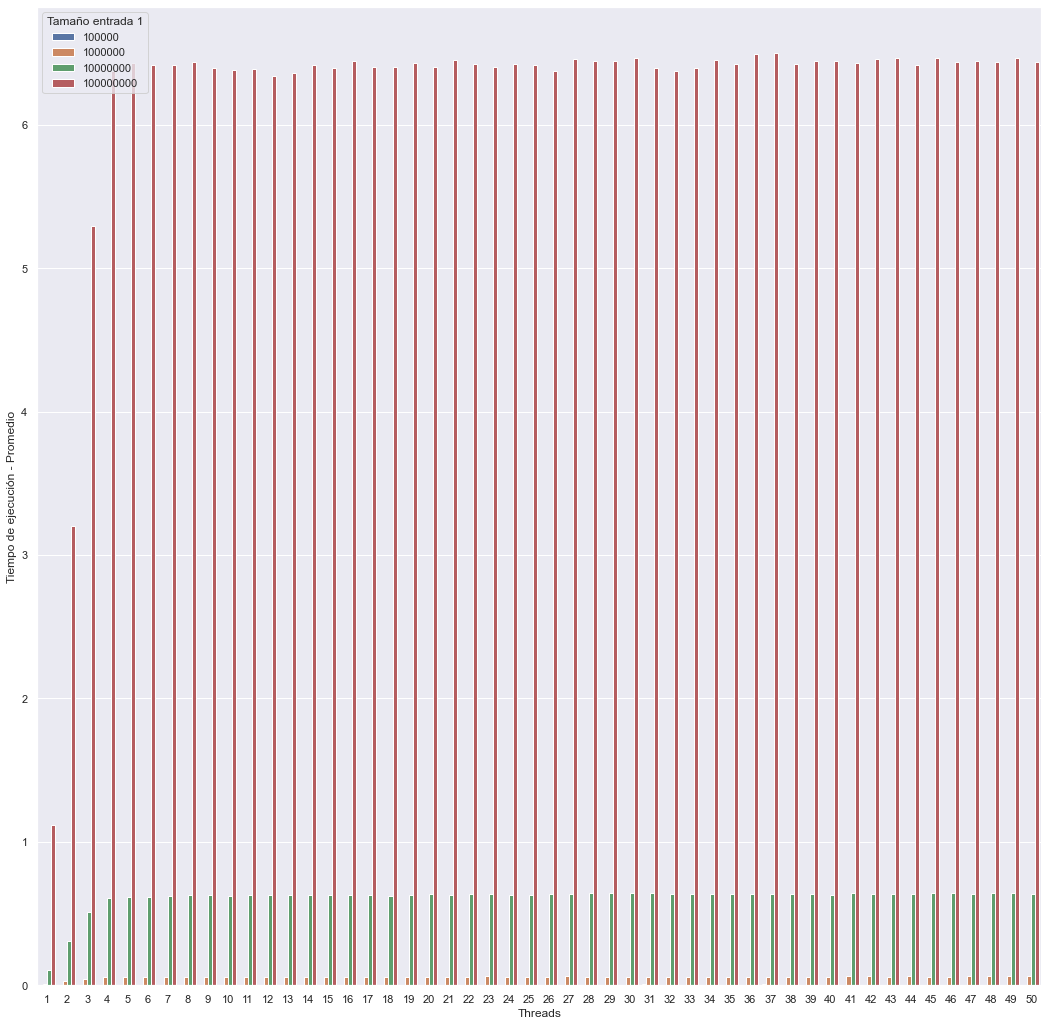

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18, 18)})

sns.barplot(data=df_integration, x="Threads", y="Tiempo de ejecución - Promedio", hue="Tamaño entrada 1")

<AxesSubplot:xlabel='Tamaño entrada 1', ylabel='Tiempo de ejecución - Promedio'>

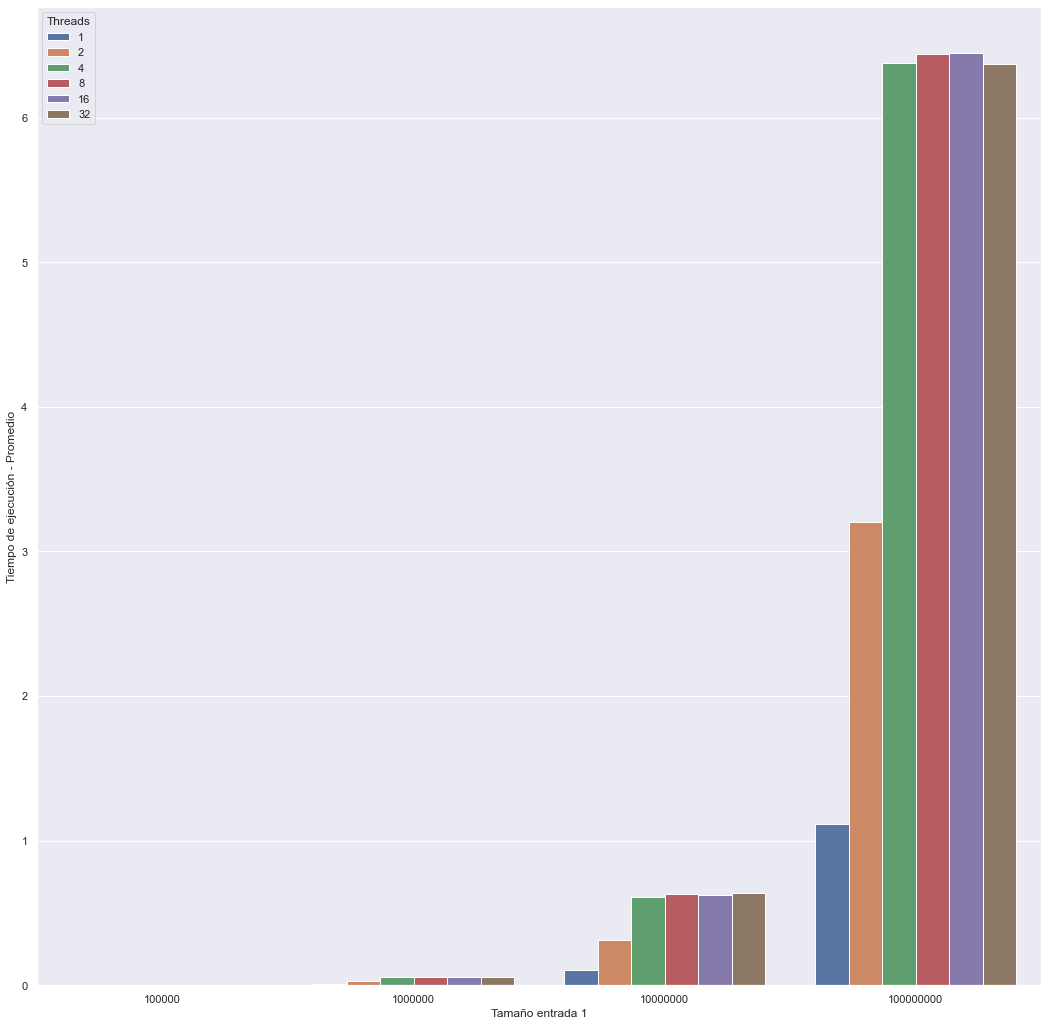

In [31]:
df_integration_filtered = df_integration[(df_integration["Threads"] & df_integration["Threads"] - 1) == 0]

sns.barplot(data=df_integration_filtered, hue="Threads", y="Tiempo de ejecución - Promedio", x="Tamaño entrada 1")

In [32]:
df_integration_filtered.to_excel("h.xlsx")

In [33]:
df_integration.to_excel(filename + ".xlsx")